# Facial Expression Recognition with Softmax and Neural Networks

The project uses a Kaggle dataset from Challenges in Representation Learning: Facial Expression Recognition challenge. The dataset consists of facial images with labels of displayed emotions.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

In [2]:
label_map = ["Anger", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]

In [3]:
df = pd.read_csv("facial_recognition.csv")
df.head()

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


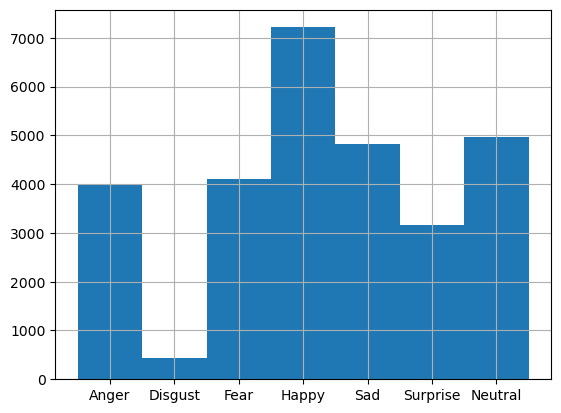

In [4]:
df["emotion"].hist(bins=np.linspace(-0.5,6.5,8))
plt.xticks(ticks=range(7), labels=label_map);

In [5]:
# we define several utilities functions
def init_weight_and_bias(M1, M2):
    W = np.random.randn(M1, M2) / np.sqrt(M1)
    b = np.zeros(M2)
    return W.astype(np.float32), b.astype(np.float32)

def softmax(A):
    expA = np.exp(A)
    return expA / expA.sum(axis=1, keepdims=True)

def cost(T, Y):
    return -(T*np.log(Y)).sum()

def error_rate(targets, predictions):
    return np.mean(targets != predictions)

def y2indicator(y):
    N = len(y)
    K = len(set(y))
    ind = np.zeros((N, K))
    for i in range(N):
        ind[i, y[i]] = 1
    return ind

def getData(balance_ones=True, Ntest=1000):
    # images are 48x48 = 2304 size vectors
    Y = []
    X = []
    first = True
    for line in open('facial_recognition.csv'):
        if first:
            first = False
        else:
            row = line.split(',')
            Y.append(int(row[0]))
            X.append([int(p) for p in row[1][1:-2].split()])

    X, Y = np.array(X) / 255.0, np.array(Y)

    # shuffle and split
    X, Y = shuffle(X, Y)
    Xtrain, Ytrain = X[:-Ntest], Y[:-Ntest]
    Xvalid, Yvalid = X[-Ntest:], Y[-Ntest:]

    if balance_ones:
        # balance the 1 class
        X0, Y0 = Xtrain[Ytrain!=1, :], Ytrain[Ytrain!=1]
        X1 = Xtrain[Ytrain==1, :]
        X1 = np.repeat(X1, 9, axis=0)
        Xtrain = np.vstack([X0, X1])
        Ytrain = np.concatenate((Y0, [1]*len(X1)))

    return Xtrain, Ytrain, Xvalid, Yvalid

## Logistic Model with Softmax

i: 0 cost: 2008.3455049822137 error: 0.845
i: 10 cost: 1893.6231444117702 error: 0.749
i: 20 cost: 1890.4037979756065 error: 0.753
i: 30 cost: 1887.892243962291 error: 0.751
i: 40 cost: 1885.5696798127674 error: 0.753
i: 50 cost: 1883.4213033927808 error: 0.746
i: 60 cost: 1881.4236194789062 error: 0.744
i: 70 cost: 1879.5544646946835 error: 0.745
i: 80 cost: 1877.7951386088052 error: 0.744
i: 90 cost: 1876.1300808635788 error: 0.746
i: 100 cost: 1874.5463610084898 error: 0.743
i: 110 cost: 1873.0332287236313 error: 0.741
i: 120 cost: 1871.5817365025 error: 0.741
i: 130 cost: 1870.1844258269957 error: 0.742
i: 140 cost: 1868.8350671209573 error: 0.74
i: 150 cost: 1867.5284448212979 error: 0.738
i: 160 cost: 1866.2601800797365 error: 0.74
i: 170 cost: 1865.0265847125806 error: 0.742
i: 180 cost: 1863.824541010264 error: 0.742
i: 190 cost: 1862.6514028912056 error: 0.741
i: 200 cost: 1861.504914637529 error: 0.741
i: 210 cost: 1860.3831440914273 error: 0.74
i: 220 cost: 1859.284427731798

i: 1820 cost: 1781.5694791238216 error: 0.68
i: 1830 cost: 1781.3474065286973 error: 0.68
i: 1840 cost: 1781.1268716640093 error: 0.68
i: 1850 cost: 1780.9078595001056 error: 0.679
i: 1860 cost: 1780.6903551932844 error: 0.679
i: 1870 cost: 1780.4743440829386 error: 0.679
i: 1880 cost: 1780.2598116887534 error: 0.679
i: 1890 cost: 1780.0467437079596 error: 0.678
i: 1900 cost: 1779.8351260126376 error: 0.677
i: 1910 cost: 1779.6249446470733 error: 0.677
i: 1920 cost: 1779.4161858251653 error: 0.678
i: 1930 cost: 1779.208835927877 error: 0.678
i: 1940 cost: 1779.0028815007422 error: 0.678
i: 1950 cost: 1778.798309251411 error: 0.678
i: 1960 cost: 1778.5951060472448 error: 0.677
i: 1970 cost: 1778.3932589129568 error: 0.676
i: 1980 cost: 1778.1927550282903 error: 0.675
i: 1990 cost: 1777.9935817257456 error: 0.675
best_validation_error: 0.675


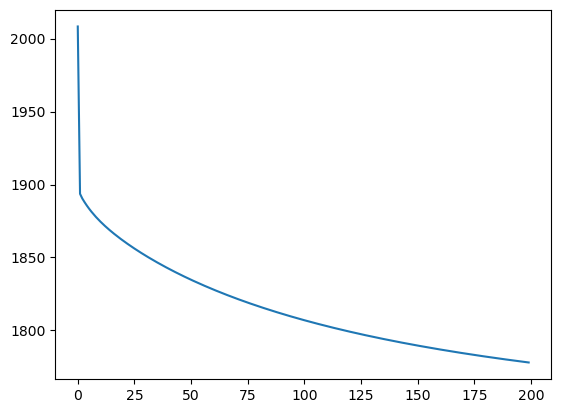

0.0


/var/folders/pl/20832w516ndbmml1sf0r8rdh0000gn/T/ipykernel_93171/3844552101.py:15: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  return np.mean(targets != predictions)


In [7]:
class LogisticModel(object):
    def __init__(self):
        pass
    
    def fit(self, X, Y, Xvalid, Yvalid, learning_rate=10e-8, reg=10e-12, epochs=2000, show_fig=False):
        Tvalid = y2indicator(Yvalid)
        
        
        N, D = X.shape
        K = len(set(Y))
        T = y2indicator(Y)
        self.W = np.random.randn(D, K) / np.sqrt(D + K)
        self.b = np.zeros(K)
        
        costs = []
        best_validation_error = 1
        
        for i in range(epochs):
            # forward propagation
            pY = self.forward(X)
            
            # gradient descent
            self.W -= learning_rate * (X.T.dot(pY - T) + reg * self.W)
            self.b -= learning_rate * ((pY - T).sum(axis=0) + reg * self.b)
            
            if i%10 == 0:
                pYvalid = self.forward(Xvalid)
                c = cost(Tvalid, pYvalid)
                costs.append(c)
                e = error_rate(Yvalid, np.argmax(pYvalid, axis=1))
                print("i:", i, "cost:", c, "error:", e)
                if e < best_validation_error:
                    best_validation_error = e
                    
        print("best_validation_error:", best_validation_error)
        
        if show_fig:
            plt.plot(costs)
            plt.show()
            
    def forward(self, X):
        return softmax(X.dot(self.W) + self.b)
    
    def predict(self, X):
        pY = self.forward(X)
        return np.argmax(pY, axis=1)
    
    def score(self, X, Y):
        prediction = self.forward(X)
        return 1 - error_rate(Y, prediction)
    
def main():
    Xtrain, Ytrain, Xvalid, Yvalid = getData()
    model = LogisticModel()
    model.fit(Xtrain, Ytrain, Xvalid, Yvalid, show_fig = True)
    print(model.score(Xvalid, Yvalid))
    
main()

## Neural Networks Model with Softmax

In [6]:
# a more efficient cost function
def cost2(T, Y):
    # same as cost(), just uses the targets to index Y
    # instead of multiplying by a large indicator matrix with mostly 0s
    N = len(T)
    return -np.log(Y[np.arange(N), T]).mean()

In [7]:
# ReLU function to use as activation in the hidden layer
def relu(x):
    return x * (x > 0)

i: 0 cost: 1.9246180459021367 error: 0.757
i: 10 cost: 1.8853141740829706 error: 0.736
i: 20 cost: 1.8765454242577009 error: 0.735
i: 30 cost: 1.8701213538860952 error: 0.728
i: 40 cost: 1.8647494851397717 error: 0.729
i: 50 cost: 1.8597188161106302 error: 0.729
i: 60 cost: 1.8555184438516337 error: 0.726
i: 70 cost: 1.851934332891662 error: 0.728
i: 80 cost: 1.8482804749340638 error: 0.73
i: 90 cost: 1.8451124185534469 error: 0.732
i: 100 cost: 1.8418830337779968 error: 0.727
i: 110 cost: 1.8389949725791097 error: 0.725
i: 120 cost: 1.8353748911272487 error: 0.723
i: 130 cost: 1.8320088169607225 error: 0.721
i: 140 cost: 1.8276321560147748 error: 0.725
i: 150 cost: 1.8234757641342394 error: 0.732
i: 160 cost: 1.8222736603988474 error: 0.732
i: 170 cost: 1.8194503667686588 error: 0.731
i: 180 cost: 1.817555213129003 error: 0.728
i: 190 cost: 1.815950369159409 error: 0.725
i: 200 cost: 1.8141418820186428 error: 0.725
i: 210 cost: 1.812664824825174 error: 0.722
i: 220 cost: 1.81117115957

i: 1830 cost: 1.6887922960237152 error: 0.649
i: 1840 cost: 1.6848065777930537 error: 0.65
i: 1850 cost: 1.6848860132487735 error: 0.648
i: 1860 cost: 1.6913919139056168 error: 0.648
i: 1870 cost: 1.7037998101387766 error: 0.664
i: 1880 cost: 1.720794136941336 error: 0.684
i: 1890 cost: 1.7445363072572115 error: 0.694
i: 1900 cost: 1.7229573217785947 error: 0.687
i: 1910 cost: 1.7194641573827538 error: 0.673
i: 1920 cost: 1.7185916480810115 error: 0.676
i: 1930 cost: 1.715463298082127 error: 0.679
i: 1940 cost: 1.7162136108500243 error: 0.678
i: 1950 cost: 1.7145042605225356 error: 0.675
i: 1960 cost: 1.7143792735541135 error: 0.675
i: 1970 cost: 1.7136226132059196 error: 0.675
i: 1980 cost: 1.7117154758882613 error: 0.677
i: 1990 cost: 1.7107843106138356 error: 0.675
best validation error: 0.625


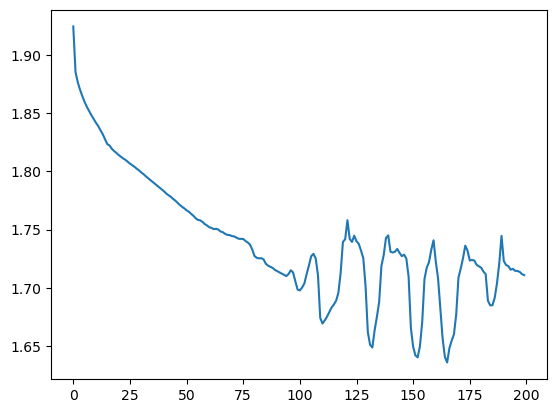

0.377


In [8]:
class ANN(object):
    def __init__(self, M):
        self.M = M
        
    def fit(self, X, Y, Xvalid, Yvalid, learning_rate=10e-7, reg = 10e-1, epochs=2000, show_fig=False):
        N, D = X.shape
        K = len(set(Y))
        T = y2indicator(Y)
        
        self.W1 = np.random.randn(D, self.M) / np.sqrt(D + self.M)
        self.b1 = np.zeros(self.M)
        self.W2 = np.random.randn(self.M, K) / np.sqrt(self.M + K)
        self.b2 = np.zeros(K)
        
        costs = []
        best_validation_error = 1
        
        for i in range(epochs):
            pY, Z = self.forward(X)
            
            # gradient descent
            pY_T = pY - T
            self.W2 -= learning_rate * (Z.T.dot(pY_T) + reg * self.W2)
            self.b2 -= learning_rate * (pY_T.sum(axis=0) + reg * self.b2)
            
            dZ = pY_T.dot(self.W2.T) * (Z > 0) #relu
            #dZ = pY_T.dot(self.W2.T) * (1 - Z * Z) # tanh
            self.W1 -= learning_rate * (X.T.dot(dZ) + reg * self.W1)
            self.b1 -= learning_rate * (dZ.sum(axis=0) + reg * self.b1)
            
            if i%10 == 0:
                pYvalid, _ = self.forward(Xvalid)
                c = cost2(Yvalid, pYvalid)
                costs.append(c)
                e = error_rate(Yvalid, np.argmax(pYvalid, axis=1))
                print("i:", i, "cost:", c, "error:", e)
                if e < best_validation_error:
                    best_validation_error = e
                    
        print("best validation error:", best_validation_error)
        
        if show_fig:
            plt.plot(costs)
            plt.show()
            
    def forward(self, X):
        Z = np.tanh(X.dot(self.W1) + self.b1)
        return softmax(Z.dot(self.W2) + self.b2), Z
    
    def predict(self, X):
        pY, _ = self.forward(X)
        return np.argmax(pY, axis=1)

    def score(self, X, Y):
        prediction = self.predict(X)
        return 1 - error_rate(Y, prediction)
    
def main():
    Xtrain, Ytrain, Xvalid, Yvalid = getData()
    
    model = ANN(200)
    model.fit(Xtrain, Ytrain, Xvalid, Yvalid, show_fig=True)
    print(model.score(Xvalid, Yvalid))
    
main()
            